<a href="https://colab.research.google.com/github/victoriamaina/PROJECT-WORK/blob/main/Moringa_Data_Science_Prep_W5_Group_Project_2021_11_Team_Four_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** KENYAN CONFLICTS**
**DEFINING THE QUESTION.**

**a) Specifying the Data Analytic Question**
The research problem is to figure out what were the major causes of conflicts, which cities did they most occur and who were the main perpetrators.

**b)Defining the Metric for Success**
This analysis requires us to come up with a solution that will help reduce the no of conflicts abundantly and be able to focus on the development of the country.
We therefore need to identify  major causes of conflicts ,who wee the major perpertors and how were they involved.and ulitimately which cities were most affected by the conflicts.
We will implement the solution by analysing our data and providing insights that arise.

**c) Understanding the context**
National peace is a treasure that most countries desire to achieve. Conflicts have been a major cause of disruption of activities in Kenya both nationwide and in localities . Conflict has hindered development and led to various problems in the country. Finding the major causes of conflict in Kenya can help the Ministry of Interior & Coordination of National Government focus on stopping those particular conflicts. Therefore, with increased conflicts on a region we tend to have minimal developments  which is essential to long-term economic growth.
The data that we are working with in this analysis is in the context of Kenyan conflicts. The main dataset contains cities ,date and years when the conflicts happened,types of conflicts and who were involved in the conflicts and no of fatalities in each case. This data was extracted from** ACLED Conflict Data for Kenya**
An understanding of main causes  is key to finding a solution on how to end conflicts.

**d) Recording the Experimental Design**
Below are the steps i took to implement this solution

**1) Business Understanding:** This sheds light to the context of the business question that we are trying to answer hence keep the focus during the data analysis so that we meet the intended objective.

**2) Reading the data:** Reading our data with and aim to understand the variables and observations.

**3) Checking our data:** This to get details about the dataset, the number of records, the statistal summary,the datatypes in our dataset among others.

**4) Data cleaning:** We performed all my data cleaning and preparation to make my data ready for analysis.

**5) Challenged the solution:**

**6)Conclusion:**


## 1.0 Importing our Libraries

In [1]:
# Importing the libraries we will need 
# Importing the pandas library
import pandas as pd

# Importing the numpy library
import numpy as np

#Importing matplotlib library
import matplotlib.pyplot as plt

## 1.1 Reading the Dataset from our CSV file





The dataset we will use contains Kenyan conflicts between 1978 and 2015.



*   Dataset link for download or access: [Link](https://data.world/acled/8fc7bcd9-5daa-44a8-b219-e707af2cd4a8)





In [2]:
# Let's load the data from the excel file and create the dataframe to be used

df=pd.read_excel("/content/Kenyan Conflicts.xlsx")

## 1.2 Previewing our Dataset


In [3]:
#Previewing the first ten rows of our data
df.head(10)

,GWNO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,ACTOR2,ALLY_ACTOR_2,INTER2,INTERACTION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,NOTES,FATALITIES
0,501,1KEN,37437,1997-01-15,1997,3,Violence against civilians,Police Forces of Kenya (1978-2002),NaN,1,Civilians (Kenya),Samburu Ethnic Group (Kenya); Turkana Ethnic G...,7,17,Kenya,Turkana,Turkana East,Katilia,Suguta Valley,2.16667,36.51667,1,BBC Monitoring Service: Africa,Police cause unknown number of fatalities as t...,10
1,501,2KEN,37438,1997-01-22,1997,1,Violence against civilians,Police Forces of Kenya (1978-2002),NaN,1,Civilians (International),Wardei Ethnic Group (Kenya),7,17,Kenya,Nakuru,Nakuru Town East,Kivumbini,Nakuru,-0.30000,36.08330,1,Reuters News,Police shot and killed an Irish priest (Fr. La...,1
2,501,3KEN,37439,1997-01-23,1997,1,Violence against civilians,Giriama Ethnic Militia (Kenya),NaN,4,Civilians (Somalia),IDPs/Refugees (Somalia),7,47,Kenya,Mombasa,Mvita,Tononoka,Mombasa,-4.05000,39.66667,1,Reuters News,Two Somali refugees are burnt to death when a ...,2
3,501,4KEN,37440,1997-01-25,1997,1,Riots/Protests,Protesters (Kenya),Catholic Group (Kenya),6,NaN,NaN,0,60,Kenya,Nakuru,Nakuru Town East,Kivumbini,Nakuru,-0.30000,36.08330,1,Associated Press International,Roman Catholic Church leaders protest the poli...,0
4,501,5KEN,37441,1997-02-09,1997,1,Violence against civilians,Police Forces of Kenya (1978-2002),NaN,1,Civilians (Kenya),Safina Political Party,7,17,Kenya,Nyeri,Nyeri Town,Rware,Nyeri,-0.41667,36.95000,1,Reuters News; Agence France Presse; Associated...,Two members of Safina party and bystanders wer...,0
5,501,6KEN,37442,1997-02-18,1997,1,Violence against civilians,Unidentified Armed Group (Ethiopia),NaN,3,Civilians (Kenya),NARC: National Rainbow Coalition,7,37,Kenya,Turkana,Turkana North,Lake Zone,Todenyang,4.53333,35.93333,1,BBC Monitoring Service: Africa,Armed raiders from Ethiopia cross the Kenyan b...,8
6,501,8KEN,37443,1997-02-23,1997,1,Remote violence,Unidentified Armed Group (Kenya),NaN,3,Civilians (Kenya),Students (Kenya); Luhya Ethnic Group (Kenya),7,37,Kenya,Kiambu,Kiambu,Riabai,Kikuyu Township,-1.16660,36.83330,1,Xinhua; Associated Press,A student leader is killed after a bomb explod...,1
7,501,7KEN,37444,1997-02-23,1997,1,Riots/Protests,Rioters (Kenya),Students (Kenya),5,NaN,NaN,0,50,Kenya,Nairobi,Starehe,Nairobi Central,Nairobi,-1.28333,36.81667,1,Reuters News; Agence France Presse,Hundreds of University of Nairobi students too...,0
8,501,10KEN,37445,1997-02-24,1997,1,Riots/Protests,Rioters (Kenya),Students (Kenya),5,NaN,NaN,0,50,Kenya,Nakuru,Nakuru Town East,Kivumbini,Nakuru,-0.30000,36.08330,1,Agence France Presse,Egerton University students in Nakuru proteste...,0
9,501,9KEN,37446,1997-02-24,1997,1,Riots/Protests,Rioters (Kenya),Students (Kenya),5,NaN,NaN,0,50,Kenya,Nairobi,Starehe,Nairobi Central,Nairobi,-1.28333,36.81667,1,Xinhua,Second day of students rioting after death of ...,0


In [4]:
#Previewing the last ten rows of our data
df.tail(10)

,GWNO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,ACTOR2,ALLY_ACTOR_2,INTER2,INTERACTION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,NOTES,FATALITIES
5031,501,5032KEN,42468,2015-12-26,2015,1,Battle-No change of territory,Kalenjin Ethnic Militia (Kenya),NaN,4,Maasai Ethnic Militia (Kenya),NaN,4,44,Kenya,Narok,Narok West,Naikarra,Olposimoru,-1.816670,35.500000,2,Daily Nation,Four are injured in continued clashes between ...,0
5032,501,5034KEN,42469,2015-12-26,2015,1,Remote violence,Police Forces of Kenya (2013-),NaN,1,Al Shabaab,NaN,2,12,Kenya,Mandera,Mandera East,Township,Mandera,3.935725,41.854211,1,Associated Press,"A member of al Shabaab, attempting to plant a ...",1
5033,501,5033KEN,42470,2015-12-26,2015,1,Violence against civilians,Vigilante Militia (Kenya),NaN,4,Civilians (Kenya),NaN,7,47,Kenya,Machakos,Mwala,Kibauni,Ndithini,-1.583330,37.683330,1,The Star (Nairobi),Two suspected thieves are lynched in Ndithini ...,2
5034,501,5035KEN,42471,2015-12-27,2015,1,Battle-No change of territory,Kalenjin Ethnic Militia (Kenya),NaN,4,Maasai Ethnic Militia (Kenya),NaN,4,44,Kenya,Narok,Narok West,Naikarra,Olposimoru,-1.816670,35.500000,2,The Star (Nairobi),Three are killed in renewed clashes between Ka...,3
5035,501,5036KEN,42472,2015-12-27,2015,1,Battle-No change of territory,Police Forces of Kenya (2013-),NaN,1,Al Shabaab,NaN,2,12,Kenya,Mandera,Mandera South,Elwak South,El Wak,2.809440,40.935830,2,Agence France Presse,Two police are attacked on 27/12 along the Laf...,4
5036,501,5038KEN,42473,2015-12-28,2015,1,Remote violence,Al Shabaab,NaN,2,Civilians (Kenya),NaN,7,27,Kenya,Mandera,Mandera East,Township,Mandera,3.935725,41.854211,1,Capital FM,Three people were killed and two others injure...,3
5037,501,5037KEN,42474,2015-12-28,2015,1,Riots/Protests,Rioters (Kenya),NaN,5,Police Forces of Kenya (2013-),NaN,1,15,Kenya,Mombasa,Nyali,Ziwa La NgOmbe,Bombolulu,-4.023489,39.703738,1,The Star (Nairobi),Police clash with a group of matatu operators ...,0
5038,501,5039KEN,42475,2015-12-28,2015,1,Riots/Protests,Protesters (Kenya),NaN,6,NaN,NaN,0,60,Kenya,Mandera,Mandera East,Township,Mandera,3.935725,41.854211,1,Capital FM,Three people were killed and two others injure...,0
5039,501,5040KEN,42476,2015-12-29,2015,1,Violence against civilians,Vigilante Militia (Kenya),NaN,4,Civilians (Kenya),NaN,7,47,Kenya,Kisumu,Nyakach,South West Nyakach,Nyakach,-0.383458,34.932411,1,The Star (Nairobi),Vigilantes lynch four suspected cattle thieves...,4
5040,501,5041KEN,42477,2015-12-30,2015,1,Violence against civilians,Vigilante Militia (Kenya),NaN,4,Civilians (Kenya),NaN,7,47,Kenya,Embu,Mbeere South,Mavuria,Gikiiro,-0.666670,37.633330,1,The Star (Nairobi),A pair of thieves are attacked and nearly lync...,0


## 1.3 Accessing Information about our Dataset

We might need to convert columns to the respective datatypes. This observation can be made by accessing information about the dataset.

In [5]:
# Getting to know more about the dataset by accessing its information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5041 entries, 0 to 5040
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GWNO              5041 non-null   int64         
 1   EVENT_ID_CNTY     5041 non-null   object        
 2   EVENT_ID_NO_CNTY  5041 non-null   int64         
 3   EVENT_DATE        5041 non-null   datetime64[ns]
 4   YEAR              5041 non-null   int64         
 5   TIME_PRECISION    5041 non-null   int64         
 6   EVENT_TYPE        5041 non-null   object        
 7   ACTOR1            5041 non-null   object        
 8   ALLY_ACTOR_1      531 non-null    object        
 9   INTER1            5041 non-null   int64         
 10  ACTOR2            3562 non-null   object        
 11  ALLY_ACTOR_2      538 non-null    object        
 12  INTER2            5041 non-null   int64         
 13  INTERACTION       5041 non-null   int64         
 14  COUNTRY           5041 n

In [6]:
#We get the shape of the dataset
df.shape

(5041, 25)

In [7]:
#Creating a copy of the dataset so that we can clean the data without affecting the main dataset
df1 = df.copy(deep = True)

## 1.4 Cleaning our Dataset

Let us perform data cleaning procedures below providing a documentation for our actions. We will perform as many data cleaning procedures as we think suitable for the various dimensions of data.

### 1.) Validity <font color="green"></font>

In [8]:
# Procedure 1:
# Data Cleaning Action: Dropping columns
# Explanation: We drop columns that are not relevant to the research we are doing.
#
df1 = df1.drop(['EVENT_ID_NO_CNTY', 'LONGITUDE', 'LATITUDE', 'NOTES', 'SOURCE', 'GWNO', 'TIME_PRECISION', 'EVENT_DATE'], axis=1)
df1.head(5)

,EVENT_ID_CNTY,YEAR,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,ACTOR2,ALLY_ACTOR_2,INTER2,INTERACTION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,GEO_PRECISION,FATALITIES
0,1KEN,1997,Violence against civilians,Police Forces of Kenya (1978-2002),NaN,1,Civilians (Kenya),Samburu Ethnic Group (Kenya); Turkana Ethnic G...,7,17,Kenya,Turkana,Turkana East,Katilia,Suguta Valley,1,10
1,2KEN,1997,Violence against civilians,Police Forces of Kenya (1978-2002),NaN,1,Civilians (International),Wardei Ethnic Group (Kenya),7,17,Kenya,Nakuru,Nakuru Town East,Kivumbini,Nakuru,1,1
2,3KEN,1997,Violence against civilians,Giriama Ethnic Militia (Kenya),NaN,4,Civilians (Somalia),IDPs/Refugees (Somalia),7,47,Kenya,Mombasa,Mvita,Tononoka,Mombasa,1,2
3,4KEN,1997,Riots/Protests,Protesters (Kenya),Catholic Group (Kenya),6,NaN,NaN,0,60,Kenya,Nakuru,Nakuru Town East,Kivumbini,Nakuru,1,0
4,5KEN,1997,Violence against civilians,Police Forces of Kenya (1978-2002),NaN,1,Civilians (Kenya),Safina Political Party,7,17,Kenya,Nyeri,Nyeri Town,Rware,Nyeri,1,0


In [9]:
# Procedure 2:
# Data Cleaning Action: Strip leading and trailing spaces
# Explanation: Strip the leading and trailing spaces 
df1['EVENT_TYPE'] = df1['EVENT_TYPE'].str.strip()
df1.head(3)

,EVENT_ID_CNTY,YEAR,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,ACTOR2,ALLY_ACTOR_2,INTER2,INTERACTION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,GEO_PRECISION,FATALITIES
0,1KEN,1997,Violence against civilians,Police Forces of Kenya (1978-2002),NaN,1,Civilians (Kenya),Samburu Ethnic Group (Kenya); Turkana Ethnic G...,7,17,Kenya,Turkana,Turkana East,Katilia,Suguta Valley,1,10
1,2KEN,1997,Violence against civilians,Police Forces of Kenya (1978-2002),NaN,1,Civilians (International),Wardei Ethnic Group (Kenya),7,17,Kenya,Nakuru,Nakuru Town East,Kivumbini,Nakuru,1,1
2,3KEN,1997,Violence against civilians,Giriama Ethnic Militia (Kenya),NaN,4,Civilians (Somalia),IDPs/Refugees (Somalia),7,47,Kenya,Mombasa,Mvita,Tononoka,Mombasa,1,2


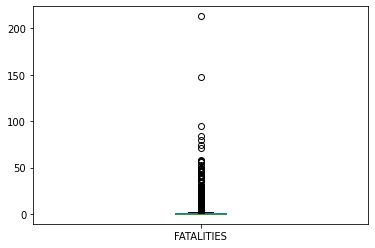

In [10]:
#Procedure 3:
#Data Cleaning Action: Outliers
#Explanation: There are existing outliers but they won;t be dropped as they are 
#true values to the data

df1.boxplot(column =["FATALITIES"], grid = False)

**plotting the outlier for the colum "fatalities"

### 2.) Accuracy <font color="green"></font>

In [11]:
# Procedure 1:
# Data Cleaning Action: No action
# Explanation: There are no accuracy errors in the dataset

### 3.) Completeness

In [12]:
# Procedure 1:
# Data Cleaning Action: Checking for null values
# Explanation: Checking for any null values
df1.isnull().any()

EVENT_ID_CNTY    False
YEAR             False
EVENT_TYPE       False
ACTOR1           False
ALLY_ACTOR_1      True
INTER1           False
ACTOR2            True
ALLY_ACTOR_2      True
INTER2           False
INTERACTION      False
COUNTRY          False
ADMIN1           False
ADMIN2           False
ADMIN3           False
LOCATION         False
GEO_PRECISION    False
FATALITIES       False
dtype: bool

In [13]:
#checking the sum of null values in descending order
df1.isnull().sum().sort_values(ascending=False)

ALLY_ACTOR_1     4510
ALLY_ACTOR_2     4503
ACTOR2           1479
FATALITIES          0
YEAR                0
EVENT_TYPE          0
ACTOR1              0
INTER1              0
INTER2              0
GEO_PRECISION       0
INTERACTION         0
COUNTRY             0
ADMIN1              0
ADMIN2              0
ADMIN3              0
LOCATION            0
EVENT_ID_CNTY       0
dtype: int64

In [14]:
# Procedure 2:
# Data Cleaning Action: Dropping null values
# Explanation: We will use the the dropna function with setting being at all. This will only drop rows that are made of only null values
#
df1.dropna(how='all').head(5)

,EVENT_ID_CNTY,YEAR,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,ACTOR2,ALLY_ACTOR_2,INTER2,INTERACTION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,GEO_PRECISION,FATALITIES
0,1KEN,1997,Violence against civilians,Police Forces of Kenya (1978-2002),NaN,1,Civilians (Kenya),Samburu Ethnic Group (Kenya); Turkana Ethnic G...,7,17,Kenya,Turkana,Turkana East,Katilia,Suguta Valley,1,10
1,2KEN,1997,Violence against civilians,Police Forces of Kenya (1978-2002),NaN,1,Civilians (International),Wardei Ethnic Group (Kenya),7,17,Kenya,Nakuru,Nakuru Town East,Kivumbini,Nakuru,1,1
2,3KEN,1997,Violence against civilians,Giriama Ethnic Militia (Kenya),NaN,4,Civilians (Somalia),IDPs/Refugees (Somalia),7,47,Kenya,Mombasa,Mvita,Tononoka,Mombasa,1,2
3,4KEN,1997,Riots/Protests,Protesters (Kenya),Catholic Group (Kenya),6,NaN,NaN,0,60,Kenya,Nakuru,Nakuru Town East,Kivumbini,Nakuru,1,0
4,5KEN,1997,Violence against civilians,Police Forces of Kenya (1978-2002),NaN,1,Civilians (Kenya),Safina Political Party,7,17,Kenya,Nyeri,Nyeri Town,Rware,Nyeri,1,0


In [15]:
df1.shape

(5041, 17)

### 4.) Consitency

In [16]:
# Procedure 1:
# Data Cleaning Action: Checking for duplicates and dropping duplicates
# Explanation: Duplicate rows will bring inconsistent values in the dataset and they will have to be dropped.
#There are no duplicate values
df1.duplicated().sum()

0

### 5.) Uniformity

In [17]:
# Procedure 2:
# Data Cleaning Action: Uniformity in ACTOR 1 Police value.
# Explanation: The police value has been divided to 3, based on year periods. The year periods are not needed and they will need to be read as a single value.
#
df1['ACTOR1'] = df1['ACTOR1'].replace('Police Forces of Kenya (1978-2002)','Kenya Police')
df1['ACTOR1'] = df1['ACTOR1'].replace('Police Forces of Kenya (2002-2013)','Kenya Police')
df1['ACTOR1'] = df1['ACTOR1'].replace('Police Forces of Kenya (2013-)','Kenya Police')


In [18]:
df1['ACTOR2'] = df1['ACTOR2'].replace('Police Forces of Kenya (1978-2002)','Kenya Police')
df1['ACTOR2'] = df1['ACTOR2'].replace('Police Forces of Kenya (2002-2013)','Kenya Police')
df1['ACTOR2'] = df1['ACTOR2'].replace('Police Forces of Kenya (2013-)','Kenya Police')

### Exporting the Cleaned Dataset

In [19]:
# Let's export our dataframe into a csv file as shown 
# we use the to_csv function to create a csv file and export it

df1.to_csv('conflicts_kenya.csv')
df2 = pd.read_csv('conflicts_kenya.csv', index_col=0)
df2.head(5)


,EVENT_ID_CNTY,YEAR,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,ACTOR2,ALLY_ACTOR_2,INTER2,INTERACTION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,GEO_PRECISION,FATALITIES
0,1KEN,1997,Violence against civilians,Kenya Police,NaN,1,Civilians (Kenya),Samburu Ethnic Group (Kenya); Turkana Ethnic G...,7,17,Kenya,Turkana,Turkana East,Katilia,Suguta Valley,1,10
1,2KEN,1997,Violence against civilians,Kenya Police,NaN,1,Civilians (International),Wardei Ethnic Group (Kenya),7,17,Kenya,Nakuru,Nakuru Town East,Kivumbini,Nakuru,1,1
2,3KEN,1997,Violence against civilians,Giriama Ethnic Militia (Kenya),NaN,4,Civilians (Somalia),IDPs/Refugees (Somalia),7,47,Kenya,Mombasa,Mvita,Tononoka,Mombasa,1,2
3,4KEN,1997,Riots/Protests,Protesters (Kenya),Catholic Group (Kenya),6,NaN,NaN,0,60,Kenya,Nakuru,Nakuru Town East,Kivumbini,Nakuru,1,0
4,5KEN,1997,Violence against civilians,Kenya Police,NaN,1,Civilians (Kenya),Safina Political Party,7,17,Kenya,Nyeri,Nyeri Town,Rware,Nyeri,1,0


## 1.5 DATA ANALYSIS

Let's answer the following questions with our dataset

In [20]:
# Question 1
# What is the main cause of conflicts in Kenya?(EVENT_TYPE)
 
df2['EVENT_TYPE'].groupby(df2['EVENT_TYPE']).count().sort_values(ascending=False) [0:5]


EVENT_TYPE
Riots/Protests                   1914
Violence against civilians       1671
Battle-No change of territory    1125
Strategic development             217
Remote violence                    99
Name: EVENT_TYPE, dtype: int64

Between 1978 and 2015, the main cause of conflicts in Kenya has been Riots/Protests.

In [21]:
# Question 2
# Who was the main actor in conflict in Kenya?(ACTOR1)

df2['ACTOR1'].groupby(df2['ACTOR1']).count().sort_values(ascending=False) [0:5]

ACTOR1
Protesters (Kenya)                  1022
Rioters (Kenya)                      810
Unidentified Armed Group (Kenya)     653
Kenya Police                         625
Vigilante Militia (Kenya)            164
Name: ACTOR1, dtype: int64

Kenyan protesters were involved in conflicts in Kenya between 1978 and 2015

In [22]:
# Question 3
# Who was the main ACTOR2 involved in Kenyan conflicts?

df2['ACTOR2'].groupby(df2['ACTOR2']).count().sort_values(ascending=False) [0:5]

ACTOR2
Civilians (Kenya)                   1496
Kenya Police                         713
Unidentified Armed Group (Kenya)     231
Rioters (Kenya)                      127
Al Shabaab                           123
Name: ACTOR2, dtype: int64

Kenyan civilians were the most common secondary party in Kenyan conflicts between 1978 and 2015.

In [23]:
# Question 4
# How many conflicts had ACTOR1 and no ACTOR2
df2['ACTOR1'].loc[df2['ACTOR2'].isnull()].count()



1479

In [24]:
# Question 5
#How many conflicts in kenya have the police been the main actors?

df2['ACTOR1'].loc[df2['ACTOR1'] == 'Kenya Police'].count()

625

Kenyan Police have been the main actor of 625 conflicts between 1978 and 2015

In [25]:
# Question 6
# How many conflicts have civilians in Kenya been the main actors

df2['ACTOR1'].loc[df2['ACTOR1'] == 'Civilians (Kenya)'].count()

133

Civilians have been main actors in 133 conflicts since 1978-2015

In [26]:
# Question 7
# How many conflicts have the un-identified ethnic militia(Kenya) been the main actors

df2['ACTOR1'].loc[df2['ACTOR1'] == 'Unidentified Ethnic Militia (Kenya)'].count()

149

Unidentified ethnic militia based in Kenya have been the  main actors in 164 conflicts

In [27]:
# Question 8
# Which city (admin1) has had the most conflicts?

df2['ADMIN1'].groupby(df2['ADMIN1']).count().sort_values(ascending=False)[0:5]

ADMIN1
Nairobi    951
Nakuru     317
Mombasa    285
Turkana    274
Garissa    228
Name: ADMIN1, dtype: int64

Nairobi City had the most conflicts with 951 cases in the period.

In [28]:
# Question 9
# Which city has had the most fatalities? 

df2['FATALITIES'].groupby(df2['ADMIN1']).sum().sort_values(ascending=False)[0:5]


ADMIN1
Turkana     1444
Nairobi      974
Mandera      844
Marsabit     637
Nakuru       521
Name: FATALITIES, dtype: int64

Turkana had the most fatalities with atleast 1444 cases

In [29]:
# Question 10
# Is the city with the most conflicts the one that has had the most fatalities?

#No, Nairobi had the most conflicts while Turkana had the most fatalities.

No, Nairobi had the most conflicts while Turkana had the most fatalities.

In [30]:
# Question 11
# Which city (admin1) has had the least conflicts?
df2['ADMIN1'].groupby(df2['ADMIN1']).count().sort_values(ascending=True)[0:1]


ADMIN1
Lake Victoria    3
Name: ADMIN1, dtype: int64

Lake Victoria had the least conflicts with 3 cases

In [31]:
# Question 12
#Which city has had the least fatalities? 
#
df2['FATALITIES'].groupby(df2['ADMIN1']).sum().sort_values(ascending=True)[0:1]

ADMIN1
Lake Victoria    0
Name: FATALITIES, dtype: int64

**Lake Victoria had the least fatalities with 0 cases

In [32]:
# Question 13 
#Is the city with the least conflicts the one that has had the least fatalities

#YES

YES

In [33]:
# Question 14
# Which year had the most conflicts?

df2['EVENT_TYPE'].groupby(df2['YEAR']).count().sort_values(ascending=False)[0:5]


YEAR
2013    668
2014    468
2008    464
2012    436
2007    434
Name: EVENT_TYPE, dtype: int64

2013 had the most conflicts overall wuth 668 cases

In [34]:
#Question 15
# What was the main cause of conflicts that year(event type)?

df2['EVENT_TYPE'].loc[df2['YEAR'] == 2013].groupby(df2['EVENT_TYPE']).count().sort_values(ascending=False)[0:1]

EVENT_TYPE
Riots/Protests    284
Name: EVENT_TYPE, dtype: int64

The main cause of conflict in 2013 was Riots/Protests with 284 cases

## **Findings**

1. The main cause of conflict in Kenya was Riots/Protests with a value of 1914. 

2. The main actors involved were protesters with a value of 1022.  

3. Nairobi was the city that was susceptible to most conflict cases. However, it was not the city with the most fatalities.



# **Recommendations**

The main cause of conflict in Kenya has been riots/protests and the main actors protesters. The ministry can use this information to find better ways of dealing with protests and protesters. The Kenya Police were found to be a prevalent actor in conflicts and they being handlers of protests can identify the best ways to handle them. Protesters and the people of the state can also be advised and shown ways they can handle their protests peacefully. 
So that fatalities can be kept at a minimum.